In [1]:

import numpy as np
import pandas as pd
from ambry import get_library
l = get_library()
b = l.bundle('build.example.com-plot-0.0.1')
N = 5000

In [12]:
import math 
import scipy.stats
import string
from itertools import combinations
from operator import concat

mu = 10
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(6, 14, N)

colors = ['red', 'blue', 'green', 'yellow', 'black']
groups = ['one', 'two', 'three', 'four']

tlcs = [reduce(concat, i) for i in combinations(string.ascii_uppercase[:15], 2) ] # 105 two letter codes. 

df = pd.DataFrame()
df['index'] = np.linspace(0,N-1, N)
df['color'] = df.index % 5
df['color_name'] = df.color.apply(lambda v: colors[v])
df['group'] = df.index % 4
df['group_name'] = df.group.apply(lambda v: groups[v])
df['side'] = np.random.choice(['left','right'], N)
df['two_codes'] =np.random.choice(tlcs, N)
df['gauss'] = np.random.normal(mu, sigma, N) 
df['gausspdf'] = scipy.stats.norm.pdf(x, mu, sigma)
df['rayleigh'] = np.random.rayleigh(3, N)
df['raypdf'] = np.histogram(np.random.rayleigh(3, 500000), N)[0]
df.drop('index',axis=1, inplace=True)

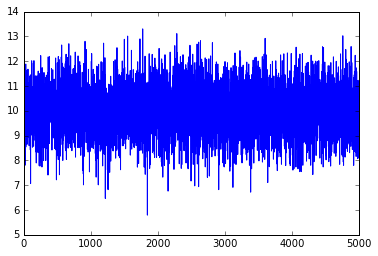